## Лабораторна робота 5. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [115]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage
sns.set(rc={'figure.figsize':(20,8.27)}) #задамо розмір для всіх подальших вікон

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [116]:
data = pd.read_csv('Mall_Customers.csv')
data.rename(columns = {'Annual Income (k$)' : 'Income', 'Spending Score (1-100)': 'SpendingScore'} , inplace="True")
data


,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [117]:
print('Атрибути вибірки')
data.info()
print()
print('Розмірніть', data.shape)
print()
print('Основна статистична інформація по числовим змінним')
print(data.describe())
print()
print('Пропуски:')
print(data.isnull().sum())

Атрибути вибірки
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Розмірніть (200, 5)

Основна статистична інформація по числовим змінним
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000

## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [118]:
data = data.drop('CustomerID', axis =1)
data

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

<Figure size 1440x595.44 with 0 Axes>

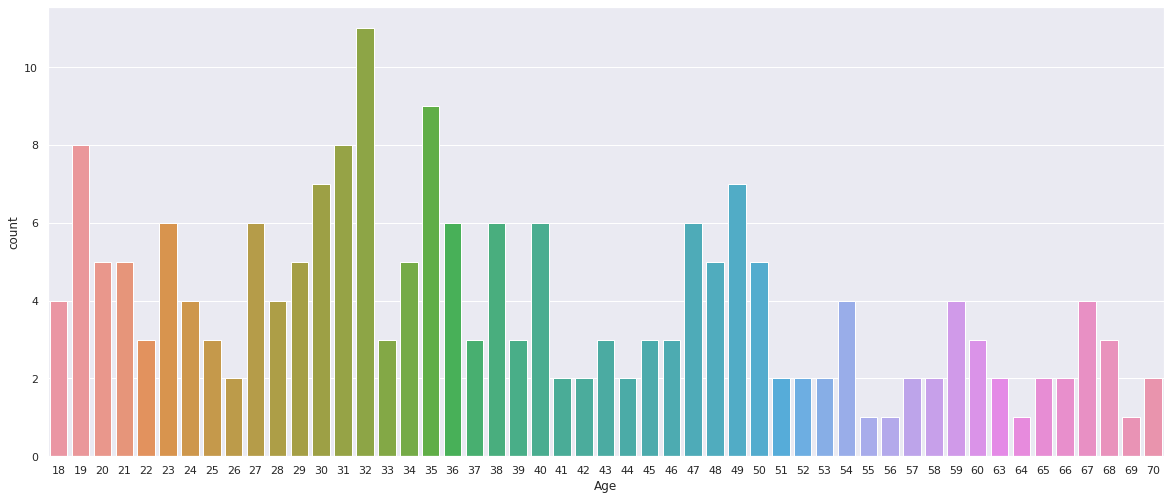

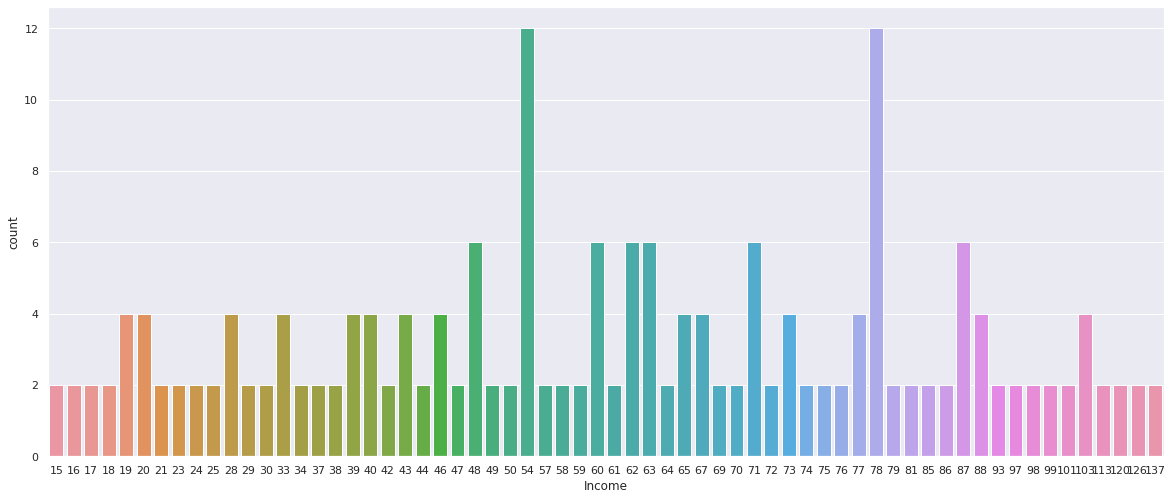

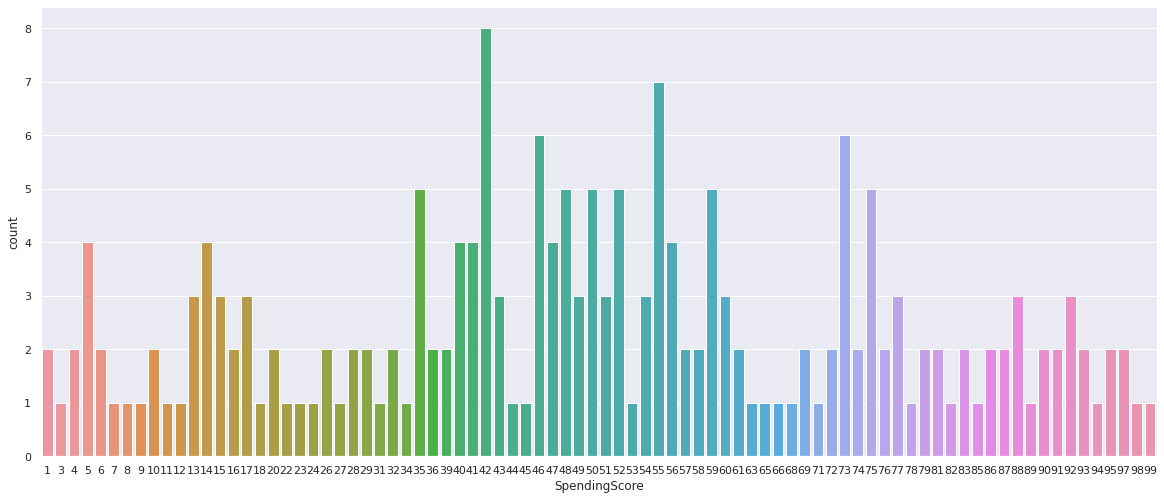

<Figure size 1440x595.44 with 0 Axes>

In [119]:
sns.countplot(data['Age'])
plt.figure()
sns.countplot(data['Income'])
plt.figure()
sns.countplot(data['SpendingScore'])
plt.figure()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

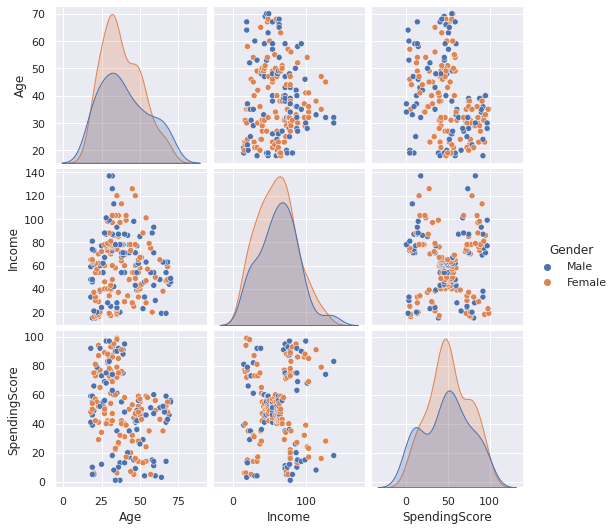

In [120]:
sns.pairplot(data, hue = "Gender")

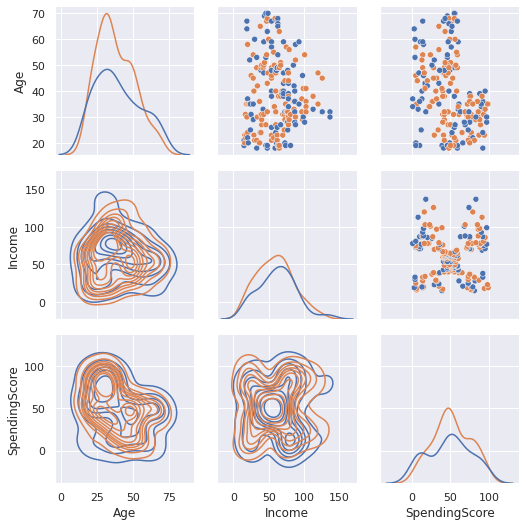

In [121]:
matr = sns.PairGrid(data, hue="Gender")
matr.map_upper(sns.scatterplot)
matr.map_diag(sns.kdeplot)
matr.map_lower(sns.kdeplot, lw=1)

**Висновки з 1-4 завдання (детальні)**

Проаналізувавши наш датасет, бачимо, що він дуже маленький без пропусків: лише 200 рядків та 5 стовпців. Тому ми переменували деякі стовпці та видалили стовебець index, бо він не несе жодної корисної інформації. 

Подивившись на вік, дохід та витрати, складно помітити якісь залежності на каунтплотах. Але коли побудували паірплоти, видна схожість на нормальний розподіл. Також помітно, що розподіл не дуже змінюється від статі, але чоловіки займають крайні позиції.   


**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Gender
Female    112
Male       88
Name: Age, dtype: int64
Чоловіків - 44.0 %. Жінок - 56.0 %


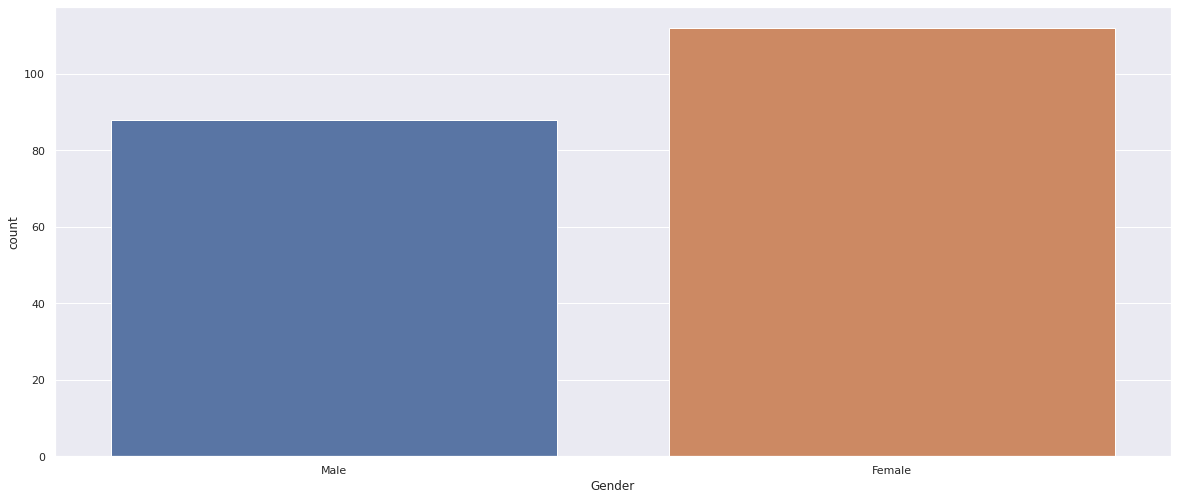

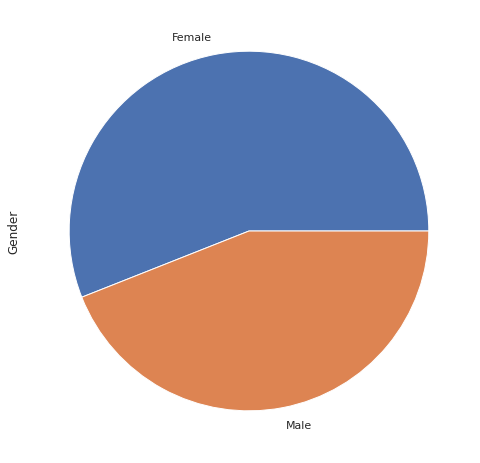

In [122]:
print(data.groupby('Gender').Age.count())
f = data['Gender'].value_counts()['Female']
m = data['Gender'].value_counts()['Male']
print('Чоловіків -', m*100/(f+m), '%. Жінок -', f*100/(f+m), '%')
sns.countplot(data['Gender'])
plt.figure()
data['Gender'].value_counts().plot.pie()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

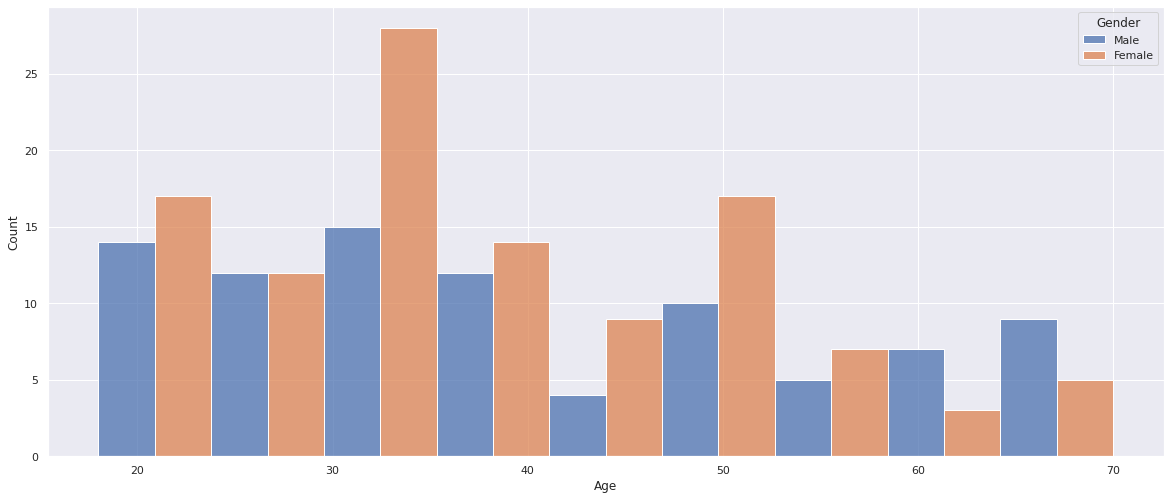

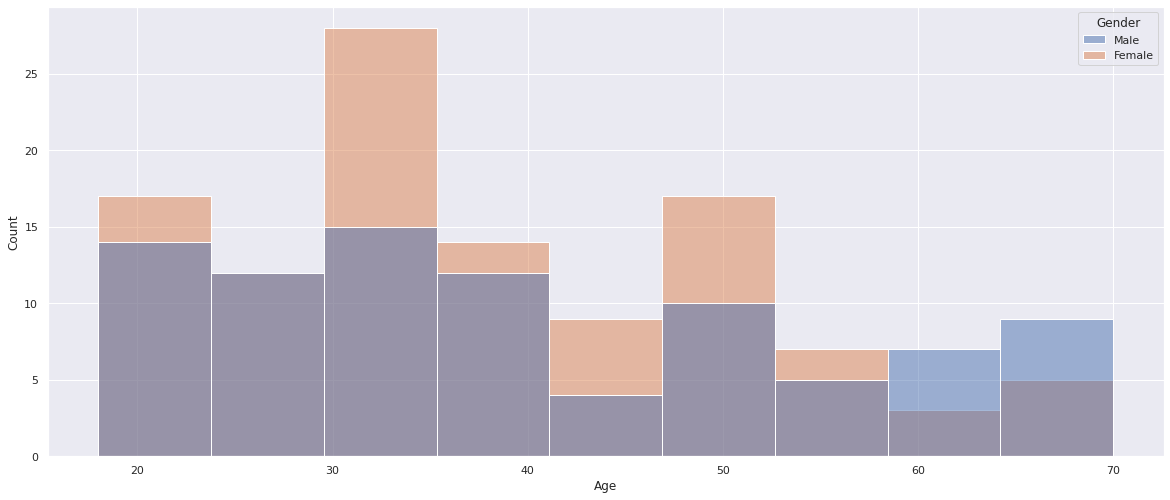

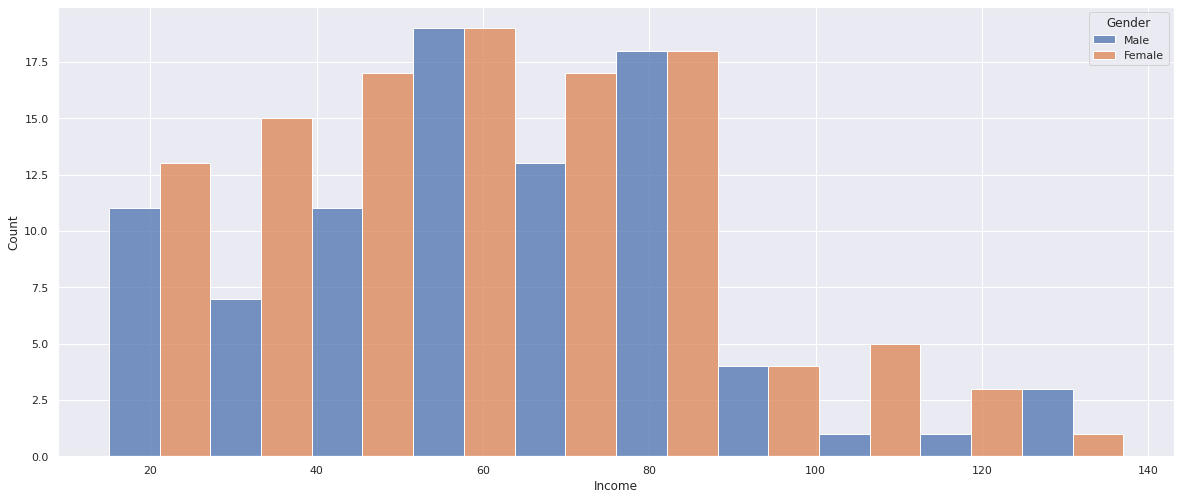

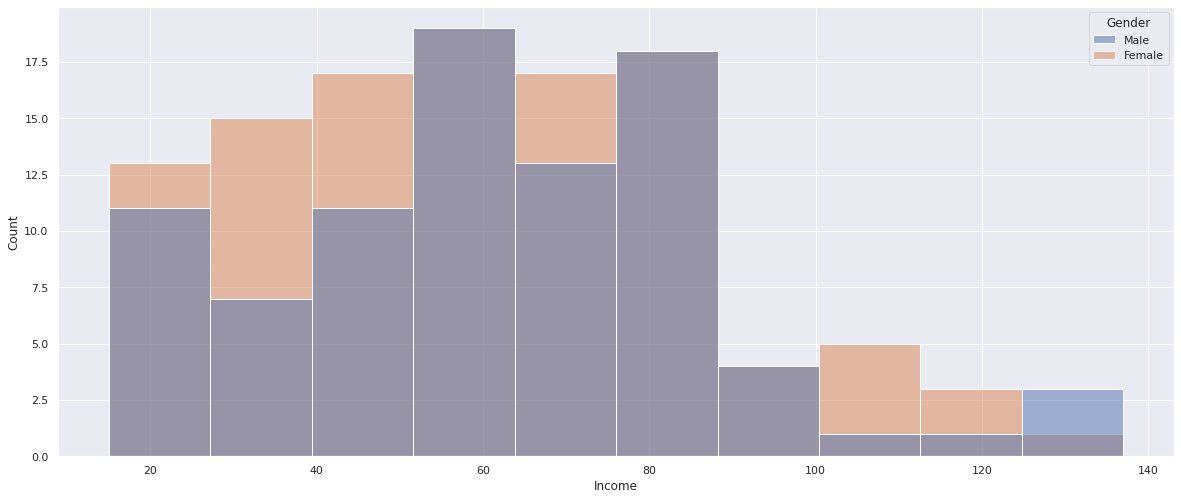

In [123]:
plt.figure()
sns.histplot(data, x='Age', hue = 'Gender', multiple = 'dodge')
plt.figure()
sns.histplot(data, x='Age', hue = 'Gender', multiple = 'layer')

plt.figure()
sns.histplot(data, x='Income', hue = 'Gender', multiple = 'dodge')
plt.figure()
sns.histplot(data, x='Income', hue = 'Gender', multiple = 'layer')

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



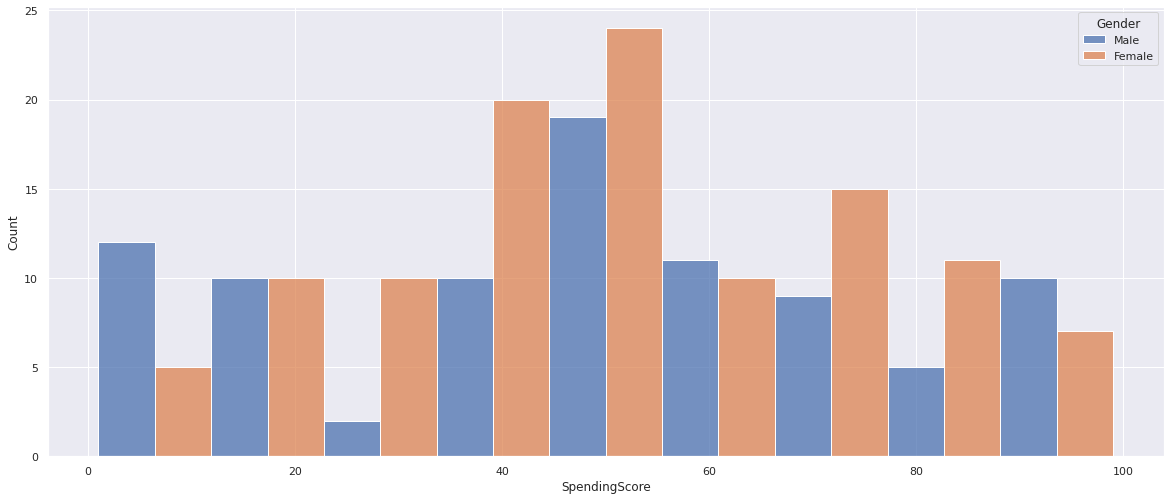

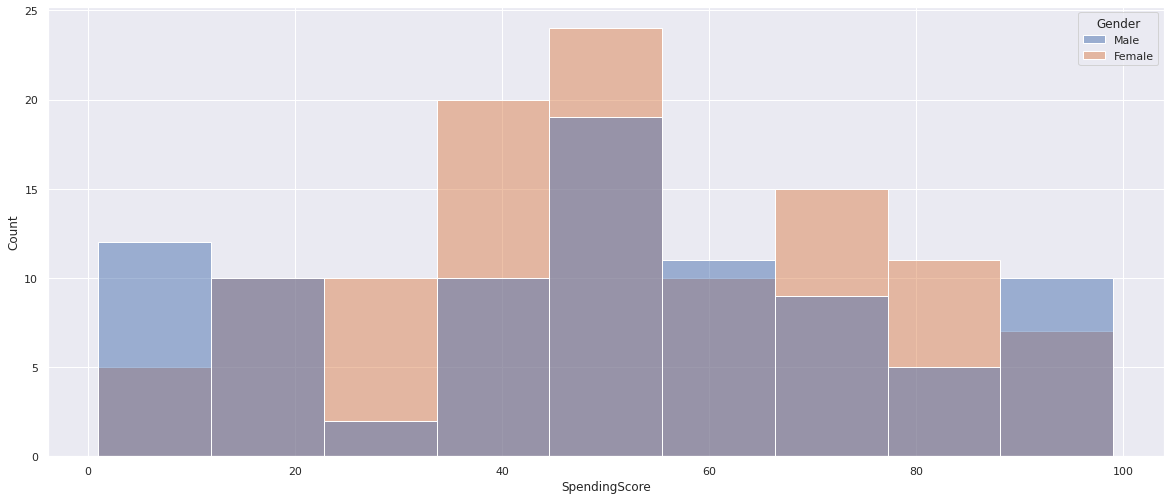

In [124]:
plt.figure()
sns.histplot(data, x='SpendingScore', hue = 'Gender', multiple = 'dodge')
plt.figure()
sns.histplot(data, x='SpendingScore', hue = 'Gender', multiple = 'layer')


**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

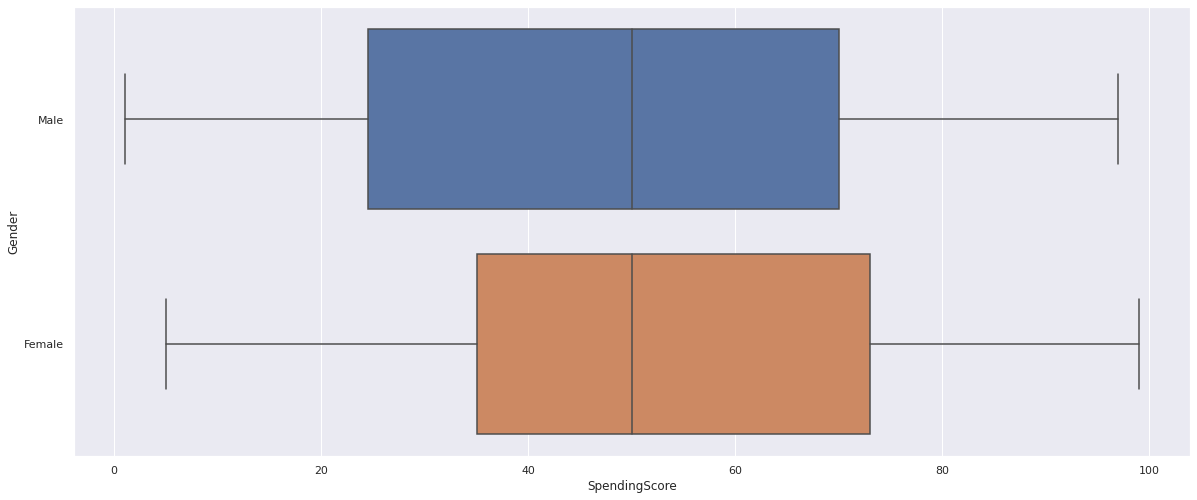

In [125]:
sns.boxplot(data = data, x='SpendingScore', y='Gender')

In [126]:
print(data.groupby('Gender').SpendingScore.mean())
print(data.groupby('Gender').Income.mean())

Gender
Female    51.526786
Male      48.511364
Name: SpendingScore, dtype: float64
Gender
Female    59.250000
Male      62.227273
Name: Income, dtype: float64


**Висновки з завдання 5 - 8(детальні)**

Яке співвідношення груп чоловіків та жінок? чоловіків 44%, жінок 56%. Чоловіків менше. 

Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? Якщо подивитися на 4-те завдання на паірплот Income та SpendingScore можно візуально виділити 5 категорій відносно доходу. Середній показник витрат за статтю приблизно однаковий.

Чи є різниця між витратами у чоловіків та жінок?
Через те, що жінок більше, здається, що жінки набагато більше витрачають, але насправді лише на 6% більше, аніж чоловіки. Видно на боксплоті, що помаранчевий прямокутник значно правіше знаходиться.   

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

Text(0, 0.5, 'Inertia')

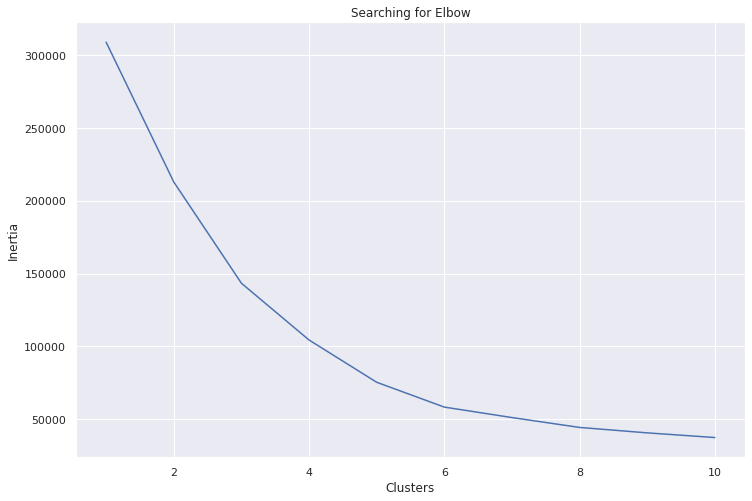

In [127]:
X = data.drop(['Gender'], axis=1)

clusters = [KMeans(n_clusters= i).fit(X).inertia_ for i in range(1, 11)] 
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Text(0, 0.5, 'Inertia')

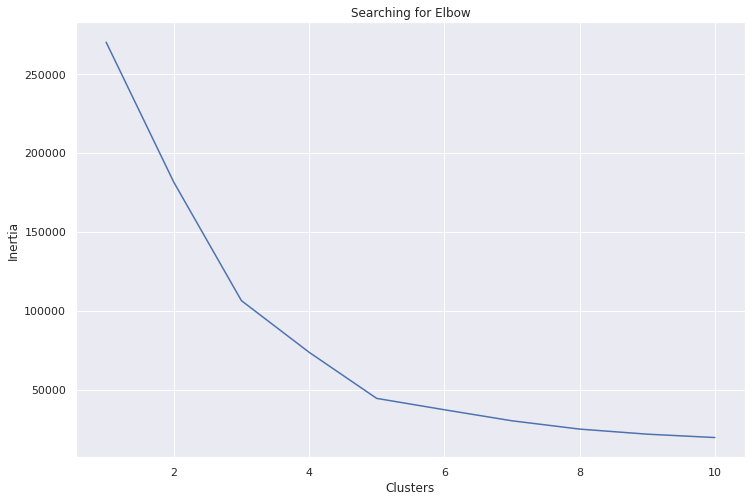

In [128]:
#візьмемо тільки доходи та витрати
Many = X[['Income', 'SpendingScore']] 
clusters = [KMeans(n_clusters= i).fit(Many).inertia_ for i in range(1, 11)]

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

**Висновки з завдання 9 (детальні)** 

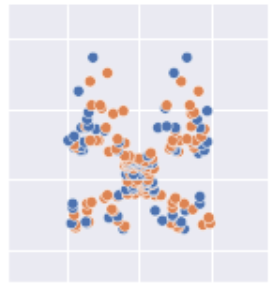

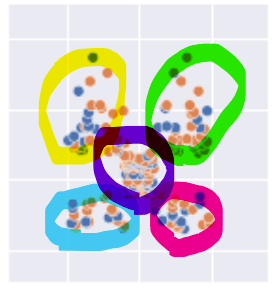

На мою думку оптимально брати 5 кластерів. Це добре видно на паірплоті Income та SpendingScore. 

Тому ми прибираємо параметр статі, який не впливає на кластери. 

Тепер будуємо графік розподілу для Age&Income&SpendingScore та Income&SpendingScore, Видно великі кути на (3 і 5) та (5 і 6) відповідно. Тому оптимальною буде кількість в 5 кластерів. 

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

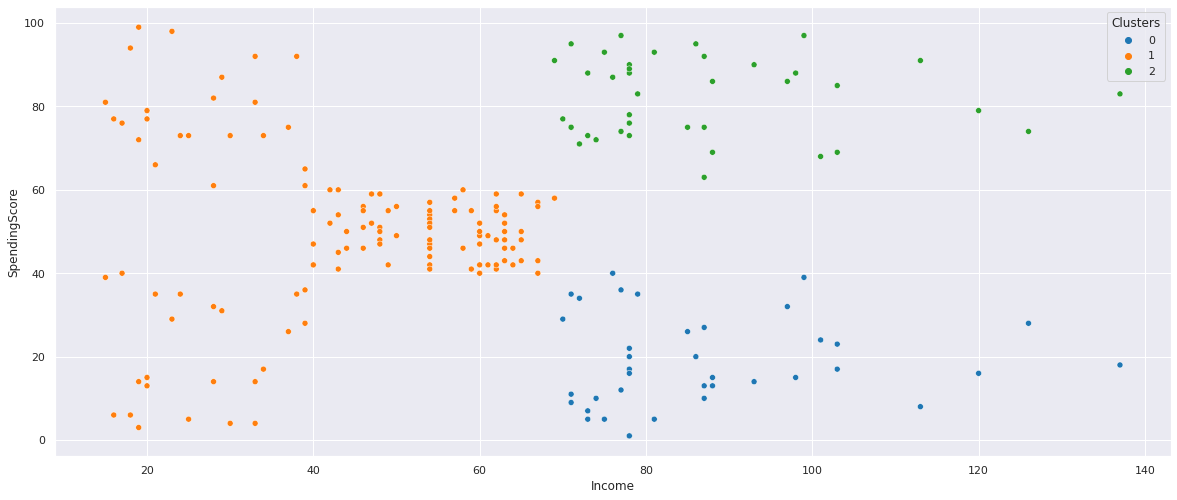

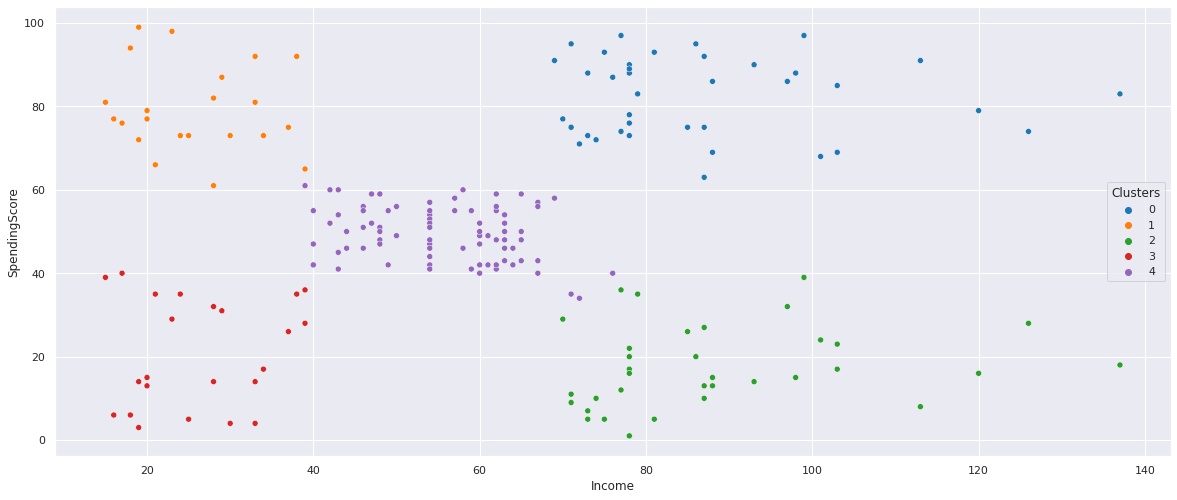

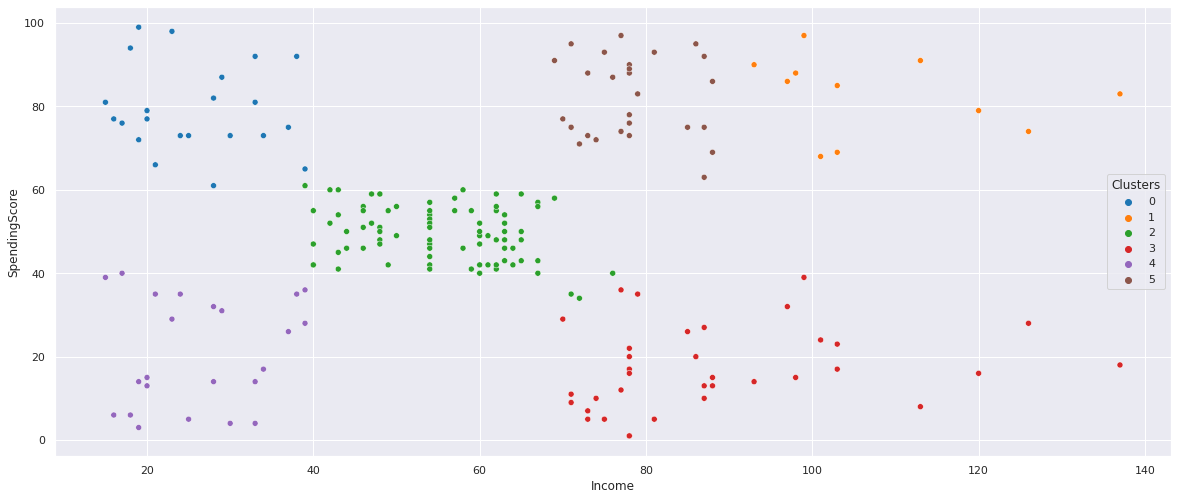

In [129]:
#зроблю для трьох кількостей кластерів: (3, 5, 6)
df  = Many
for i in (3, 5, 6):
  df['Clusters'] = KMeans(n_clusters=i).fit(Many).predict(df)
  plt.figure()
  sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Clusters', palette='tab10')
  

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [130]:
#зроблю для трьох кількостей кластерів: (3, 5, 6)
df  = X
for i in (3, 5, 6):
  df['Clusters'] = KMeans(n_clusters=i).fit(X).predict(df)

  figure = px.scatter_3d(df, x='Income', y='SpendingScore', z='Age', color="Clusters")
  figure.show()
  

**Висновки з завдання 10 - 11 (детальні)** 

Зробивши кластерізацію на 3, 5 та 6 кластерах видно наступне:

Якщо 6 кластерів, то найменший кластер (у 2d - коричневий, 3d - жовтий) виглядає як викиди одного з кластерів. Він доволі позсіяний та відстань між точками дуже велика як для такої малої кількості точок. 

Кластерізація на трьох виглядає доволі симпатично. Але можно проглянути наступнку логіку: синій кластер: ті, хто мало зарабляють; зелені - багато зарабляють та мало витрачають; помаранчеві - багато заробляють та багато витрачають. Виглядає логічно, але один синіх точок- половина.
Мені здається, це не дуже добре, коли один кластер - половина вибірки, тому відкидаємо цю ідею.

Залишається початково прогнозовані 5 кластерів. 

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


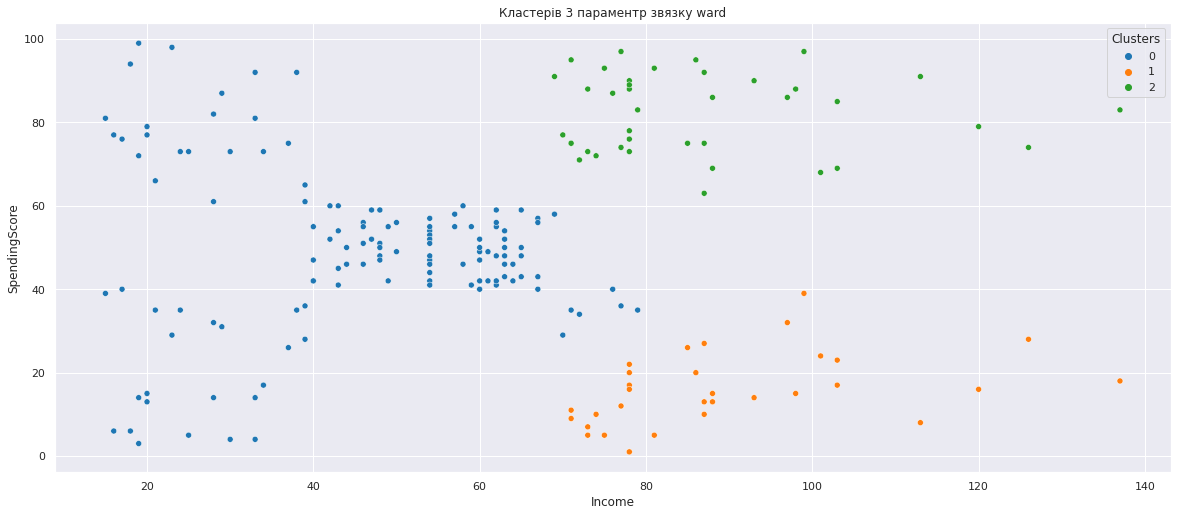

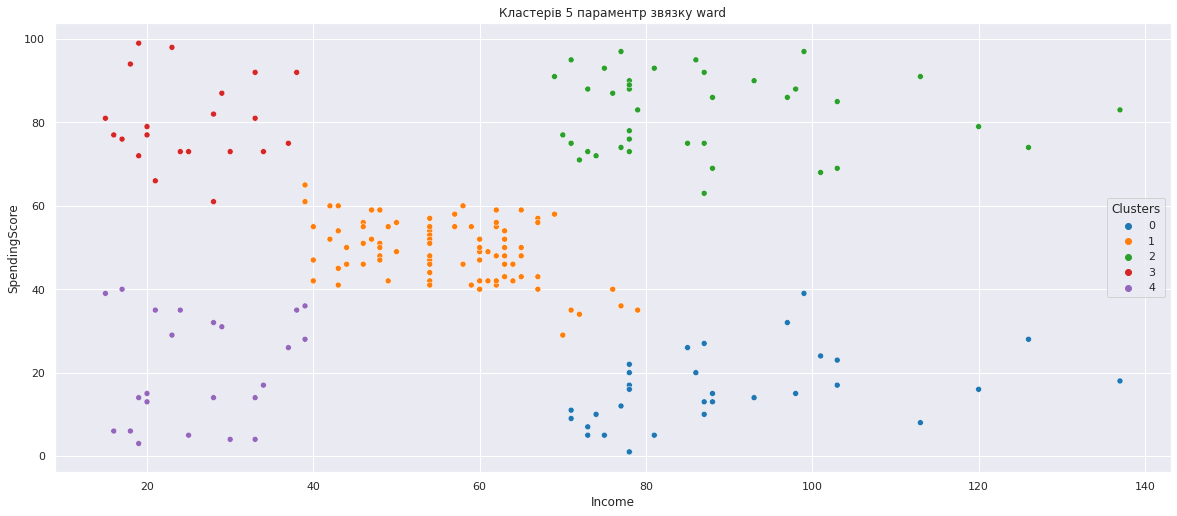

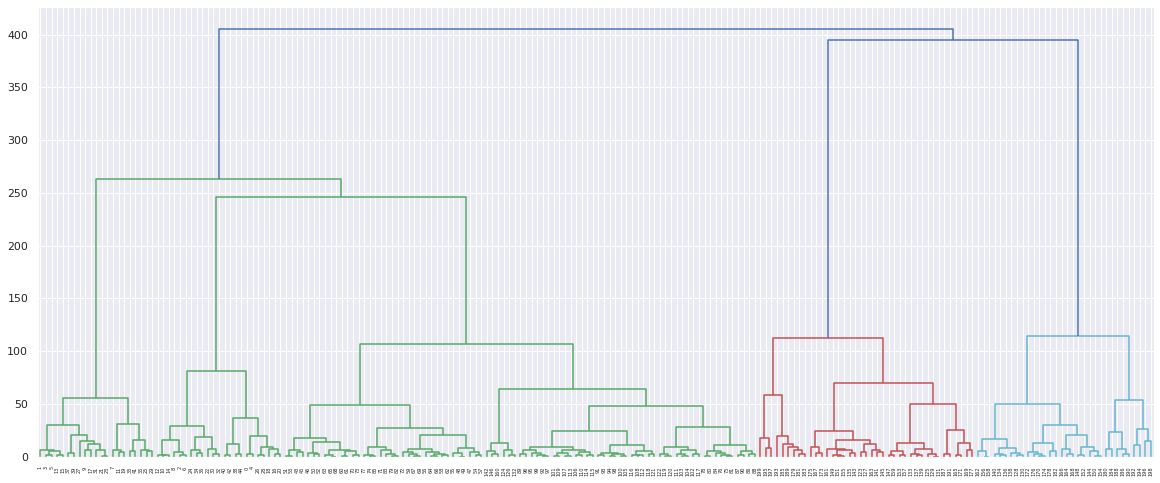

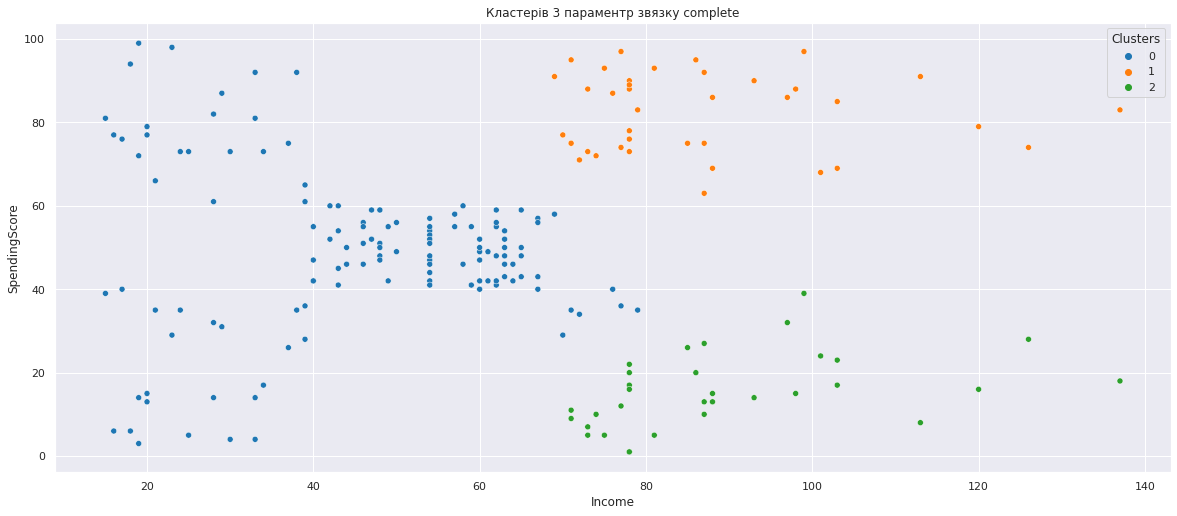

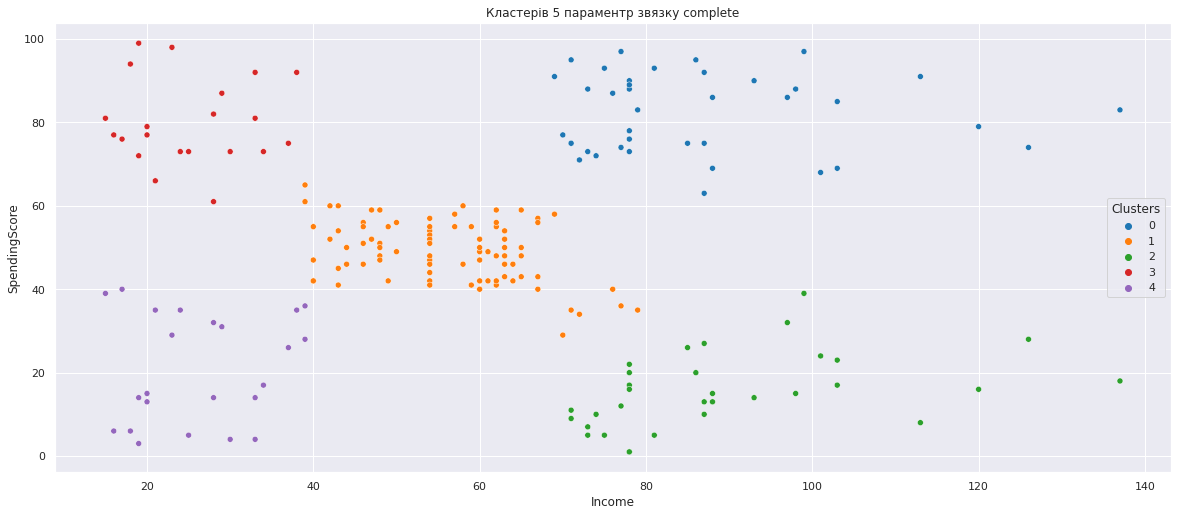

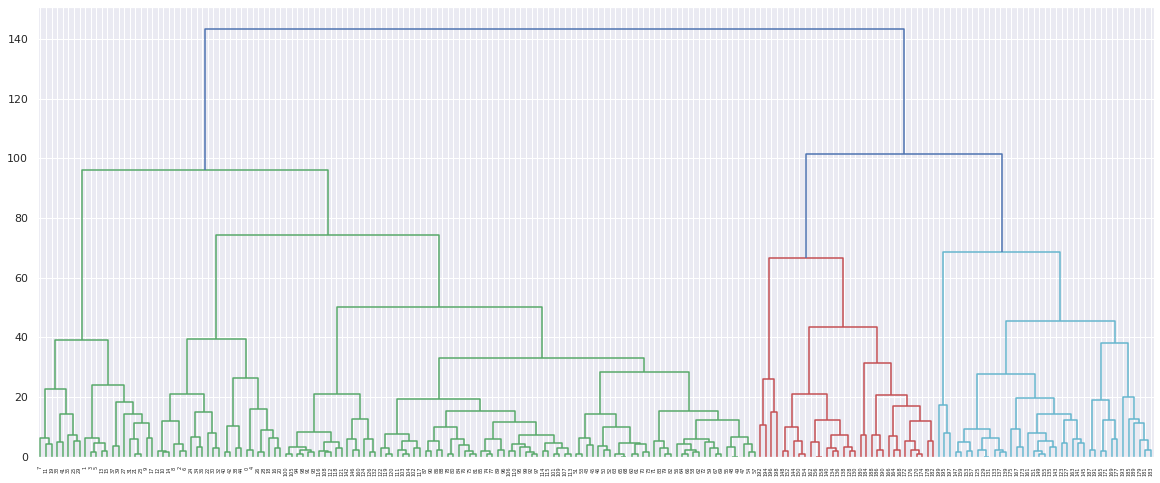

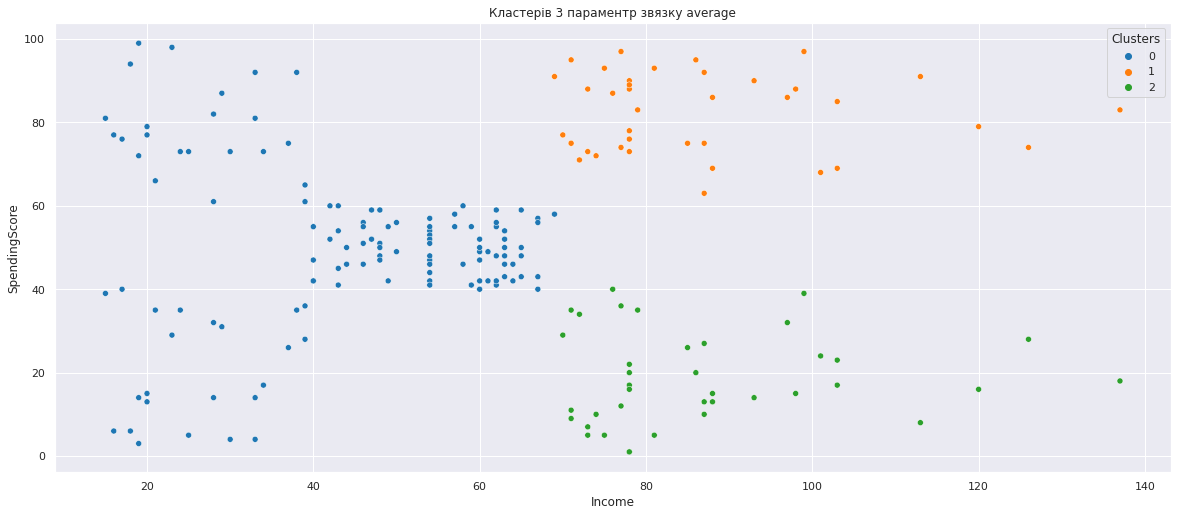

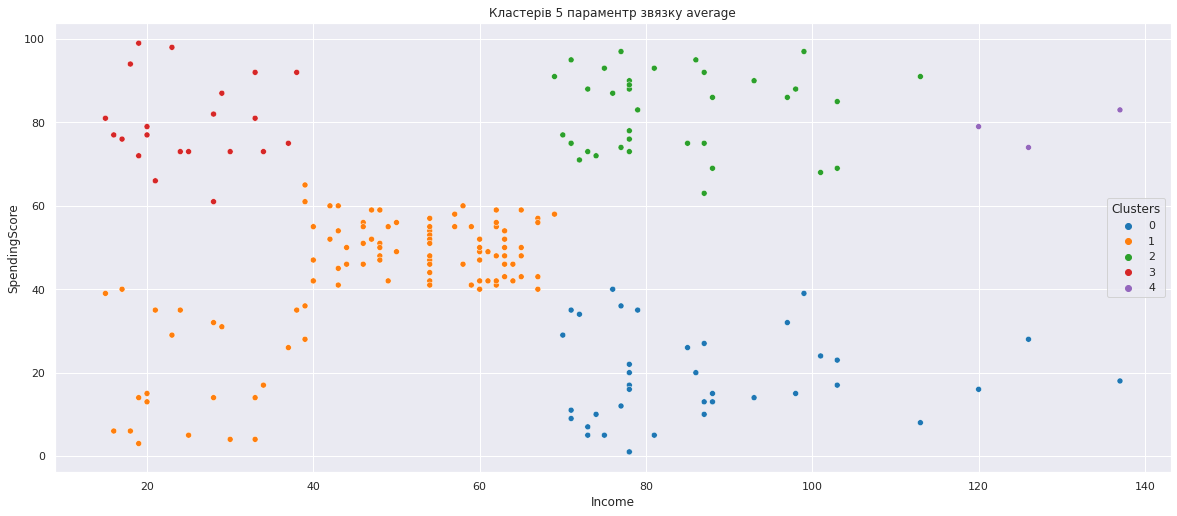

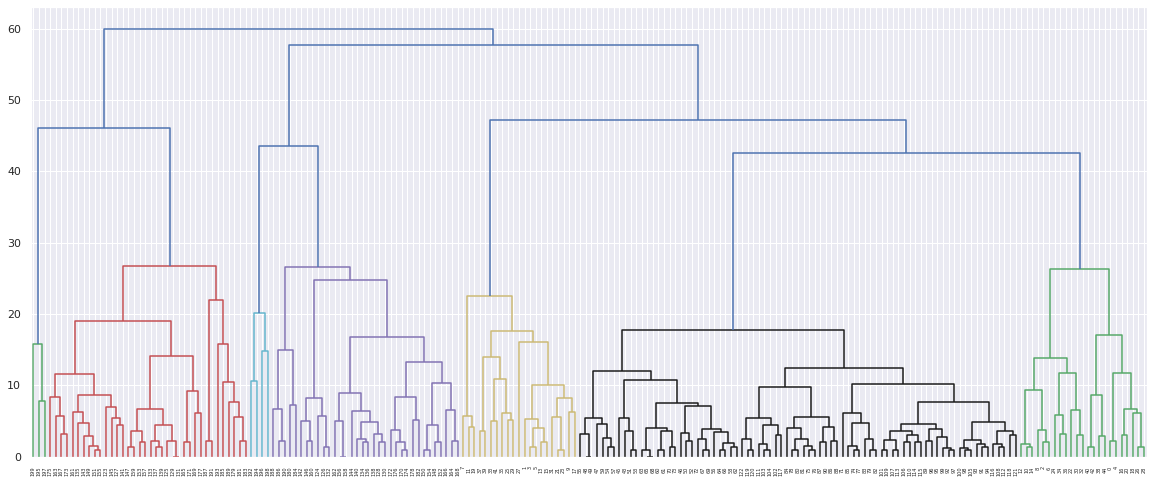

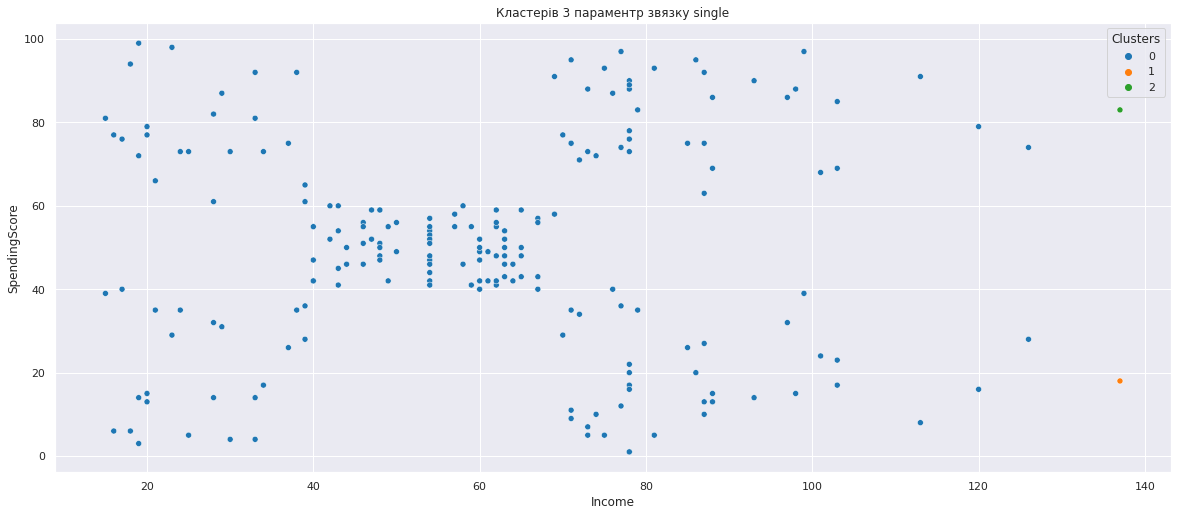

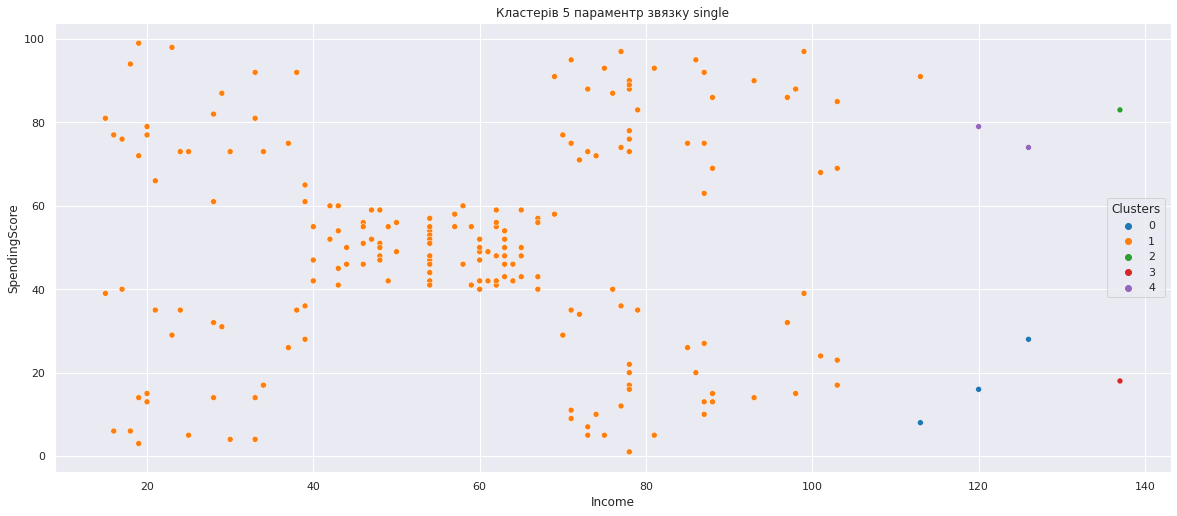

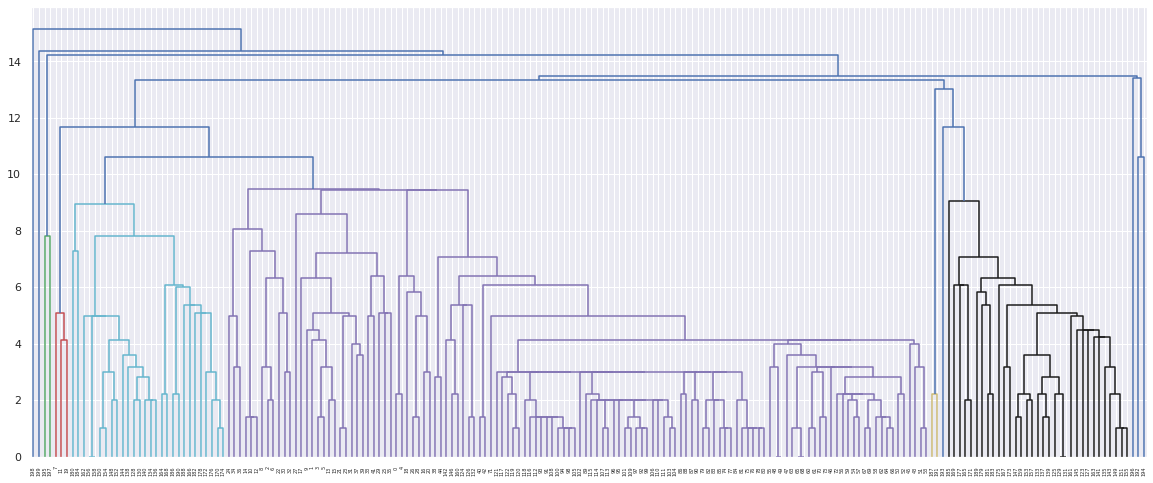

In [131]:
#буду робити при n_clusters = (3, 5)
df  = Many
for l in ('ward', 'complete', 'average', 'single'):
  for i in (3, 5):
    df['Clusters'] = AgglomerativeClustering(n_clusters=i, linkage= l).fit_predict(Many)
    plt.figure()
    s  = 'Кластерів ' + str(i) +' параментр звязку '+ str(l)
    plt.title(s)
    sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Clusters', palette='tab10')
  # будуємо дендограму для кожного методу
  plt.figure()
  dendrogram(linkage(Many, l))



**Висновки з завдання 12 (детальні)**

При викорисанні single в деяких класах було лише по 1-3 точці. 

При використанні average на п'яти точках помаранчевий класс був дуже маштабним, а фіолетовий як важкий його хвіст. 

А ось при ward та complete були однаково хороші результати. Будемо використовувати ward, бо він параметр за замовчуванням.

Коли ми зробили на трьох класах класифікації (при ward) синій клас почав "налазити на помаранчевий", тому я вирішила, що кінцева кількість класів 5.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

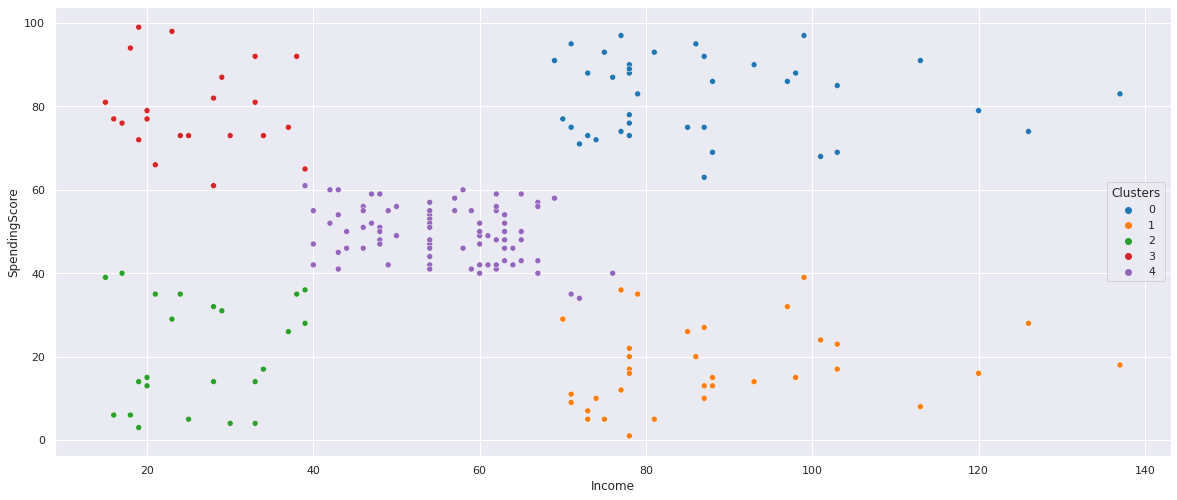

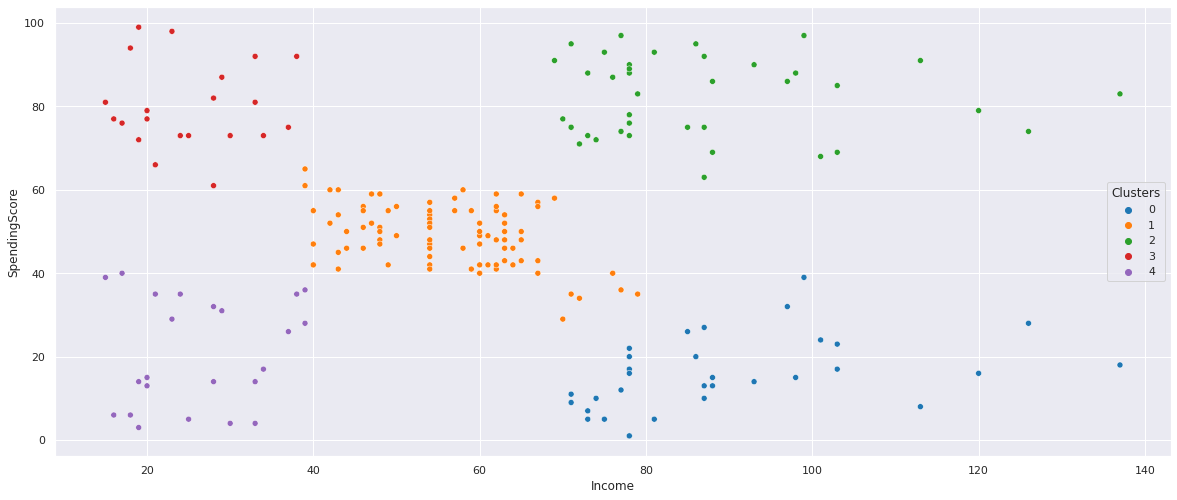

In [132]:
# Кінцева кількість класів 5
df = Many
df['Clusters'] = KMeans(n_clusters=5).fit(Many).predict(df)
plt.figure()
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Clusters', palette='tab10')

df = Many
df['Clusters'] = AgglomerativeClustering(n_clusters=5).fit_predict(Many)
plt.figure()
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Clusters', palette='tab10')


**Висновки з завдання 13 (детальні)**

Було вирішено, що кількість кластерів дорівнює 5. 

Порівнявши два методи KMeans та AgglomerativeClustering помічені різниці на границях різних кластерів: правий верхній з середнім - 1 точка; нижній лівий та середній - 3 точки. Це незначні нестиковки. 

Кластернізація була зроблена успішно, що підтверджується майже однаковими результати двох різних методів. 

Я не стала б казати який метод краще, але мені зручніше і зрозуміліше було працювати з KMeans.